## 패키지 및 데이터 불러오기 

In [4]:
!pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3-py3-none-any.whl


In [5]:
import numpy as np   # numpy 패키지 불러오기 
import pandas as pd  # pandas 패키지 불러오기 
import matplotlib  # matplotlib 패키지 불러오기 
import matplotlib.pyplot as plt # 그래프 시각화를 위한 패키지 불러오기
import seaborn as sns  # seaborn 패키지 불러오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 
from matplotlib import font_manager, rc  # matplotlib안 한글 깨짐 처리
import platform   # 현재 사용하고 있는 시스템 유형을 알려주는 패키지 
import plotly.express as px  # 더 나은 시각화를 위해 plotly 패키지 불러오기 
%matplotlib inline

# 운영체제에 맞게 폰트 설정
if platform.system() == "Windows":
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시
warnings.filterwarnings(action='ignore') # 경고 매세지 강제로 없애주는 설정

### 1. EDA
- 데이터는 총 2가지를 사용
  - 'TV_GRPs_by_models_v2_0507.csv'
  - 브랜드 컬럼이 추가된 'TV_GRPs_by_models_v2_0507_1.csv'

#### 1-1 데이터 불러오기 

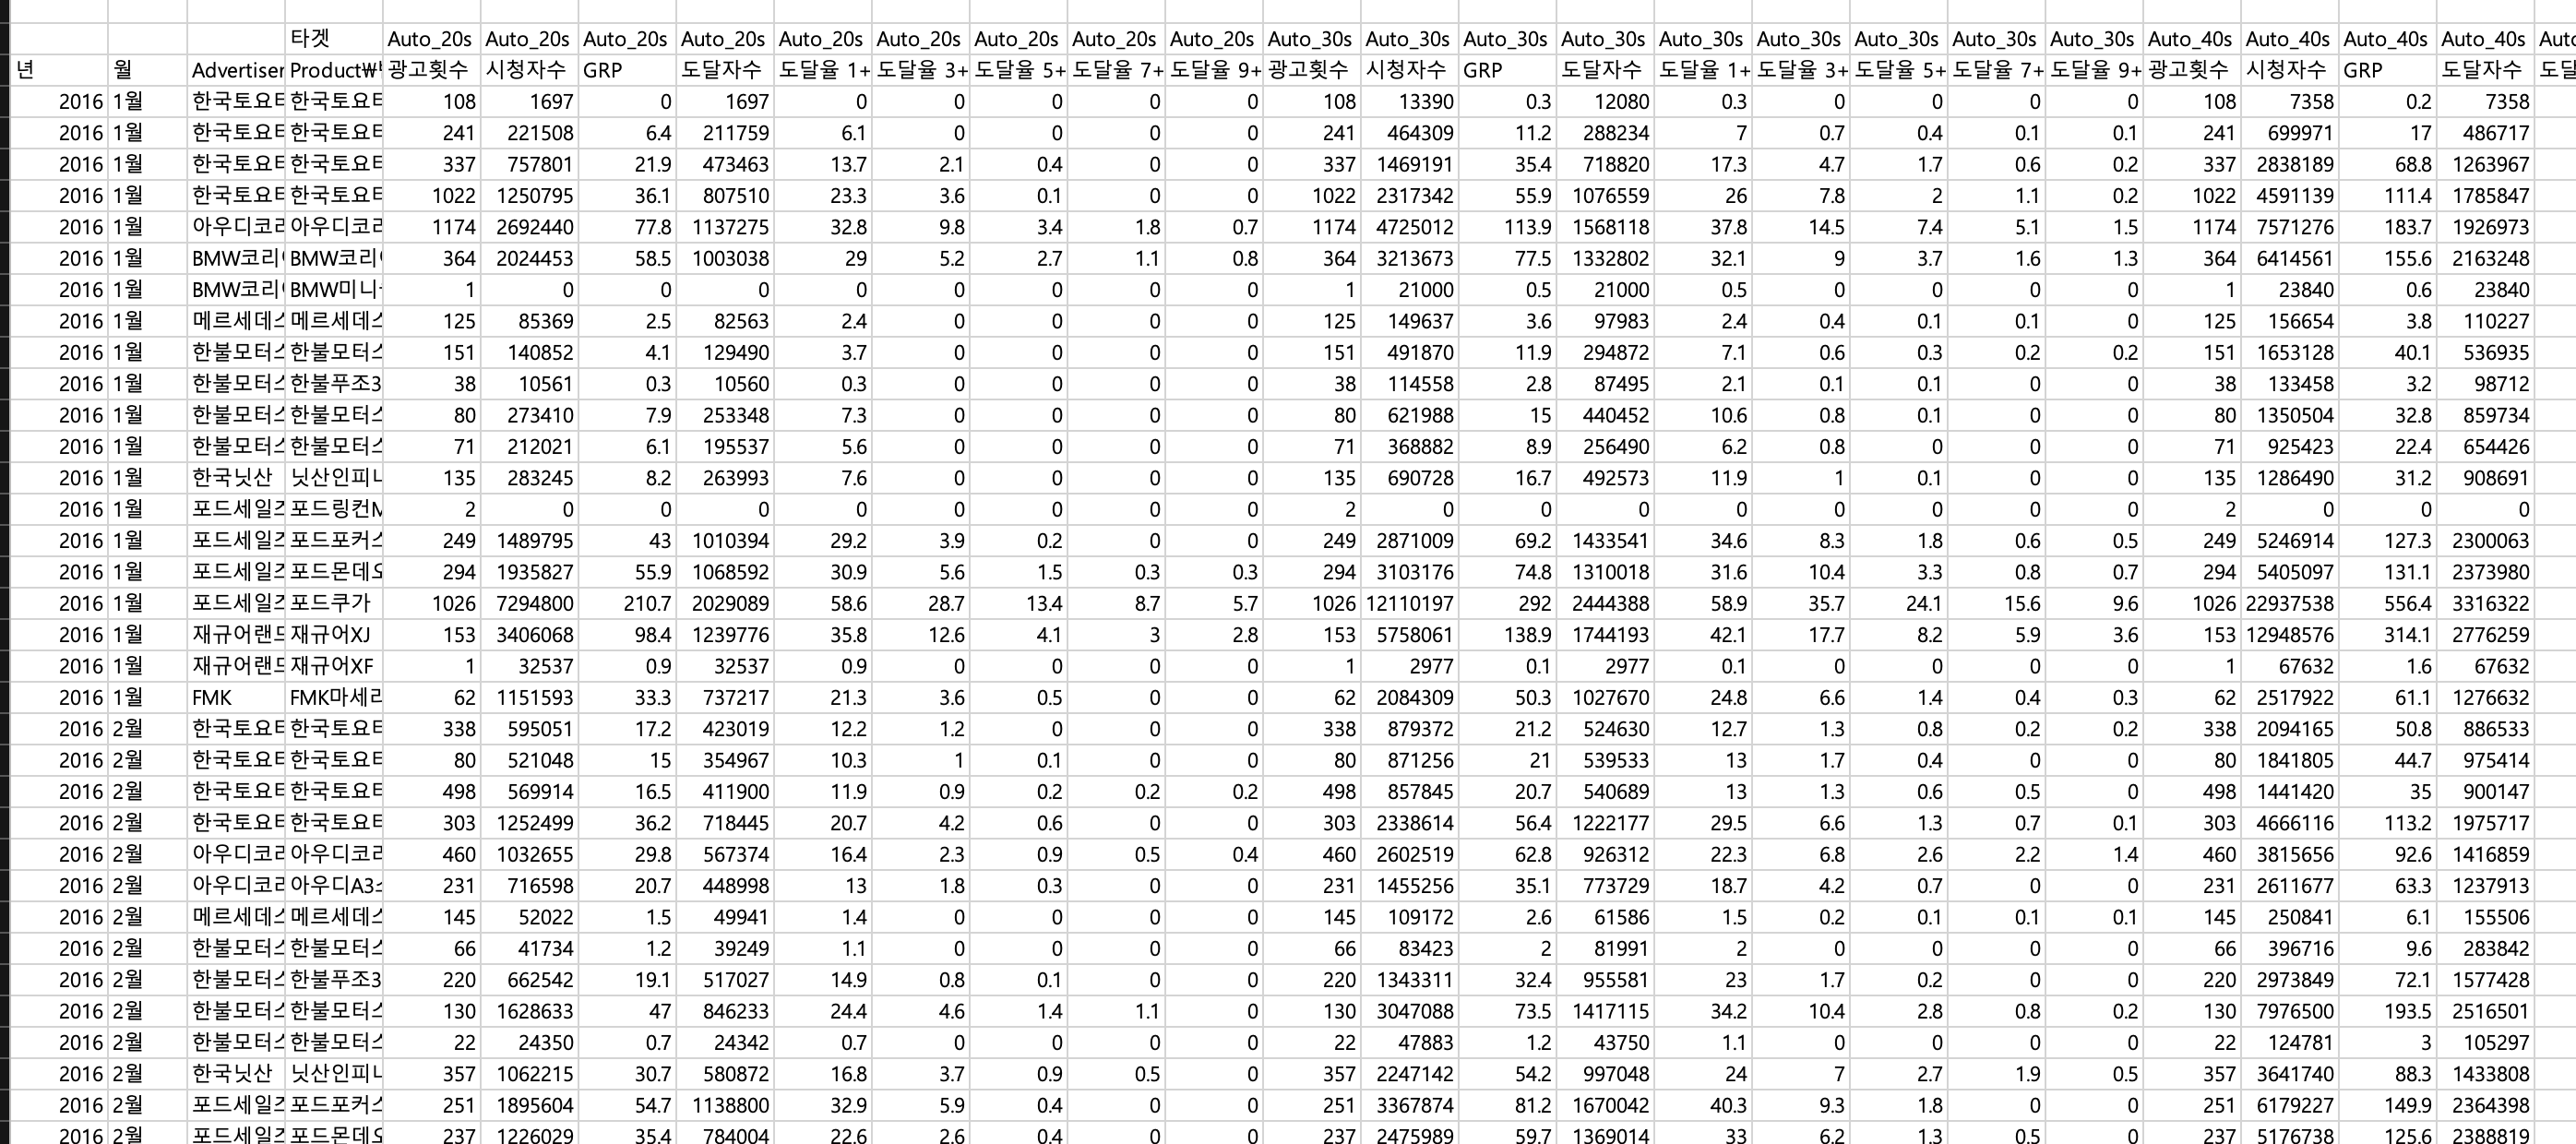
- 원 오리지널 광고 데이터 

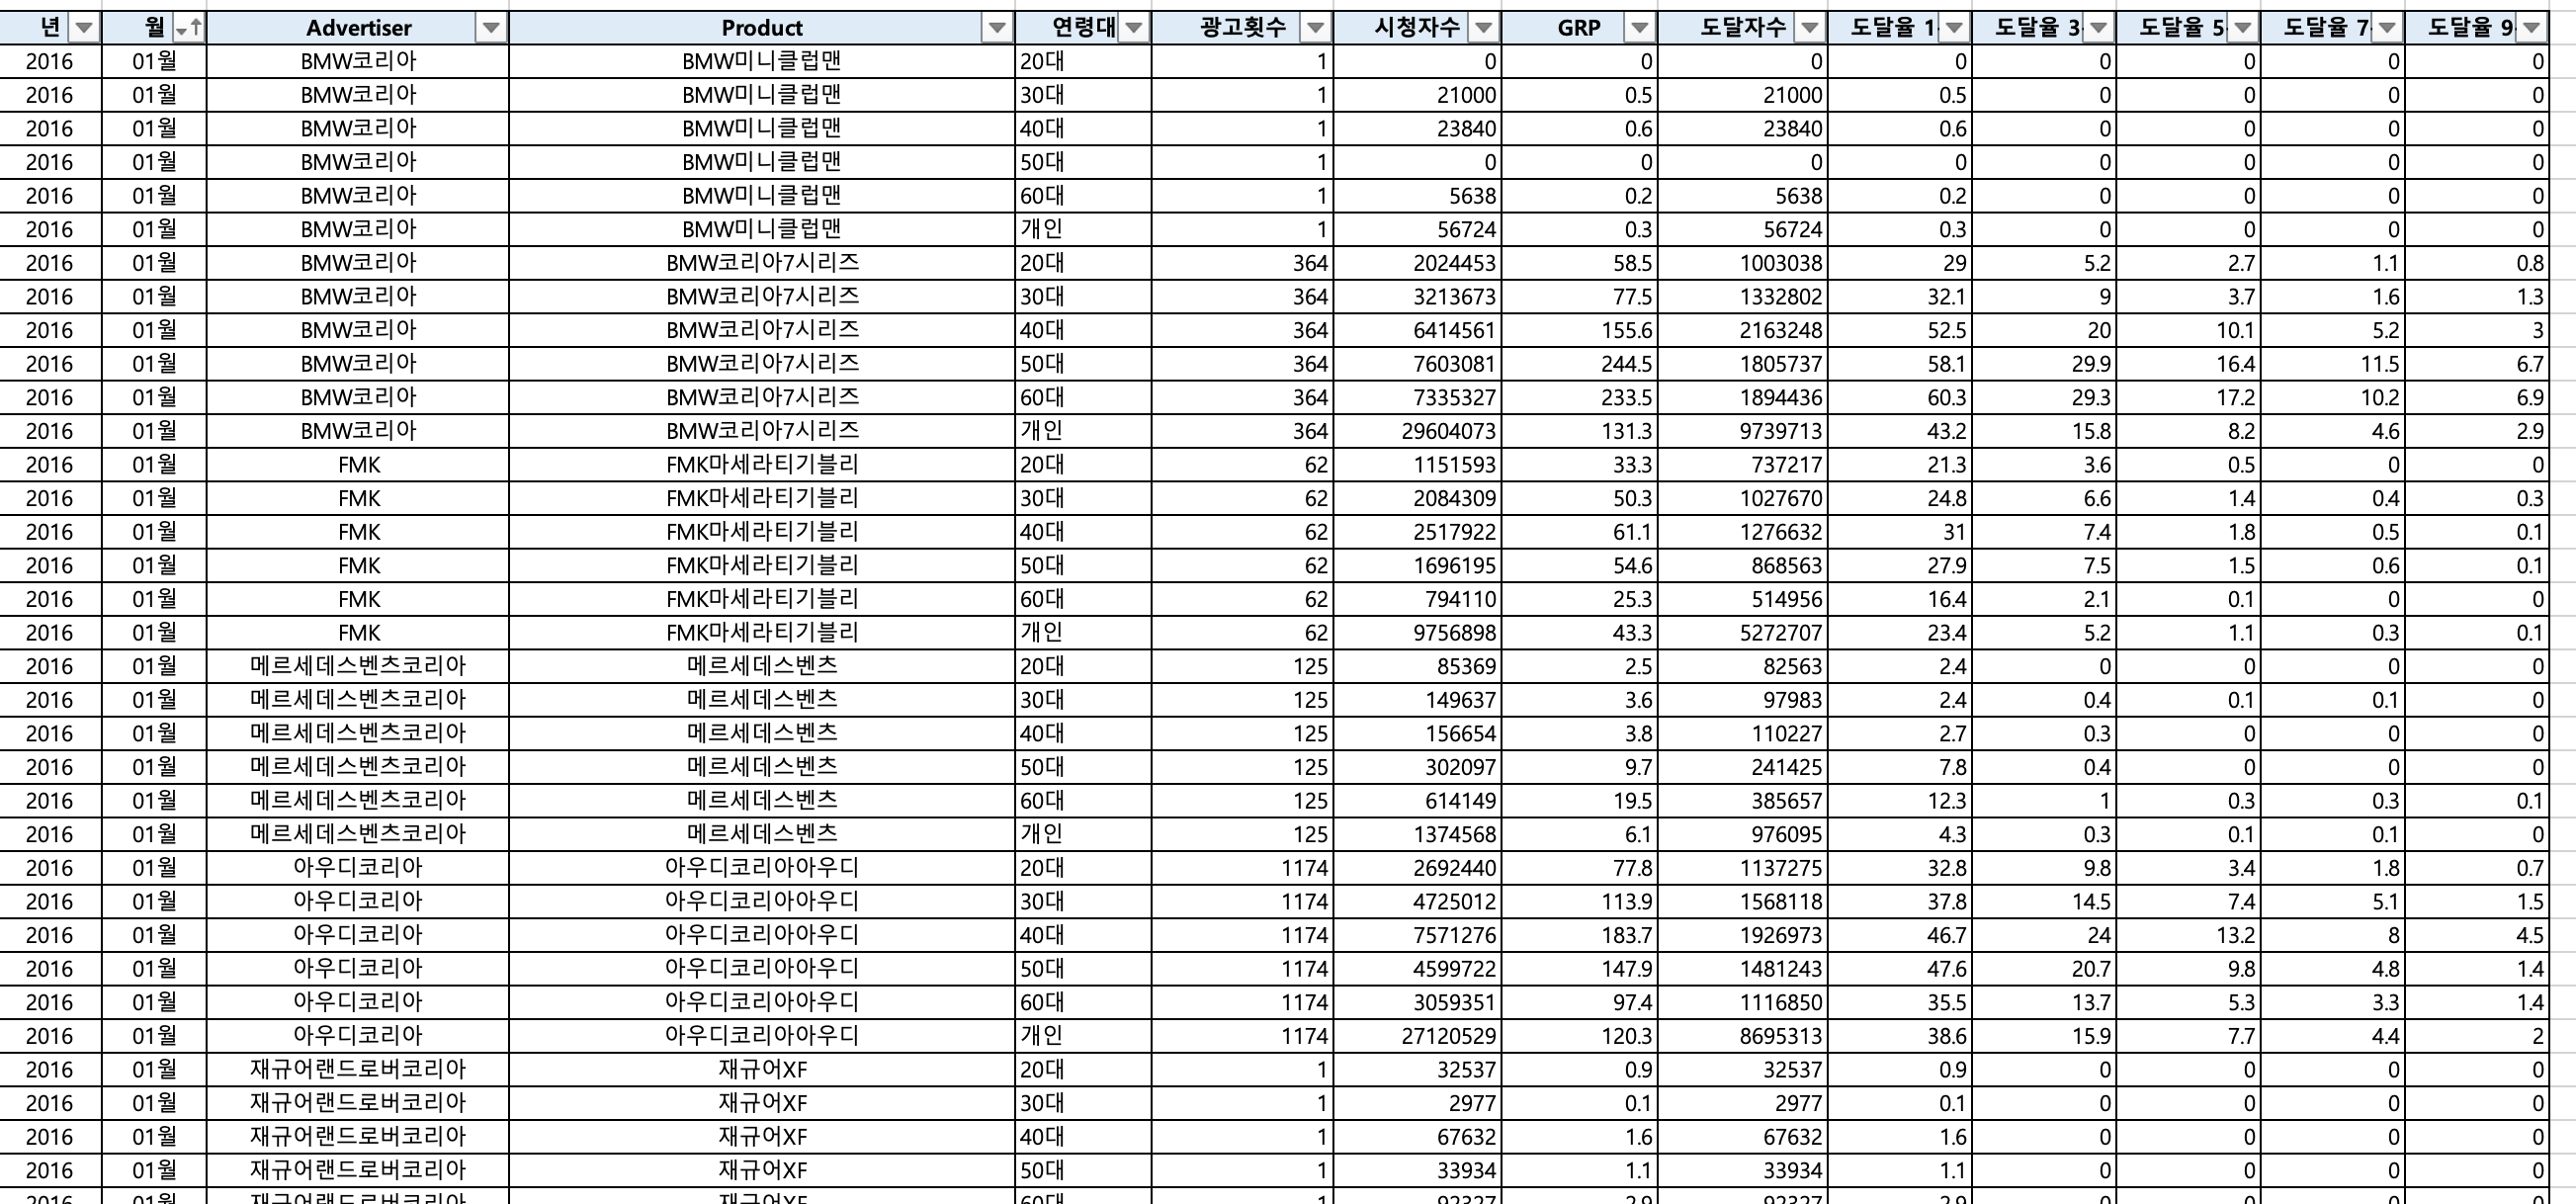
- 팀 내에서 정리한 데이터 

In [42]:
data = pd.read_csv('./TV_GRPs_by_models_v2_1.csv')

In [43]:
# 브랜드가 추가된 데이터 
data

,년,월,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+
0,2016,01월,BMW코리아,BMW,BMW미니클럽맨,20대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2016,01월,BMW코리아,BMW,BMW미니클럽맨,30대,1,21000,0.5,21000,0.5,0.0,0.0,0.0,0.0
2,2016,01월,BMW코리아,BMW,BMW미니클럽맨,40대,1,23840,0.6,23840,0.6,0.0,0.0,0.0,0.0
3,2016,01월,BMW코리아,BMW,BMW미니클럽맨,50대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2016,01월,BMW코리아,BMW,BMW미니클럽맨,60대,1,5638,0.2,5638,0.2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,2020,10월,혼다코리아,혼다,혼다CR-V,30대,27,9939,0.3,9939,0.3,0.0,0.0,0.0,0.0
6290,2020,10월,혼다코리아,혼다,혼다CR-V,40대,27,32944,0.8,27119,0.7,0.0,0.0,0.0,0.0
6291,2020,10월,혼다코리아,혼다,혼다CR-V,50대,27,35197,0.9,25964,0.6,0.0,0.0,0.0,0.0
6292,2020,10월,혼다코리아,혼다,혼다CR-V,60대,27,36975,0.8,19556,0.4,0.1,0.1,0.0,0.0


#### 1-2 전처리 

In [45]:
# 모델(Product)을 한글 -> 영문으로 바꾸려는 함수 
def converter(model_name):
    for key, value in model_names.items():
        if model_name == key:
            model_name = value
            
    if type(model_name) == list:
        model_name = ", ".join(model_name)
    return model_name

In [46]:
# 바꿀 영문명 Product (기준 : DB팀에서 조사한 Product 영문명 기준)
model_names = {'BMW미니JCW클럽맨&컨트리맨': ["MINI-MINI Cooper Clubman", "MINI-MINI Cooper Countryman"],
'아우디Q8': "Audi-Q8", "볼보*": "Volvo-*", "포드레인저": "Ford-Ranger", "한국토요타시에나": "Toyota-Sienna Limited",
'FMK마세라티': "Maserati-*", "아우디A4": "Audi-A4", "아우디A6아반트&A4": "Audi-A6 Avant",
 "아우디A6아반트&A4": ["Audi-A6 Avant", "Audi-A4"], "폭스바겐골프": "Volkswagen-Golf",
 "닛산인피니티Q30": "Infiniti-Q30", "한국토요타렉서스LC500H": "Lexus-LC500h",
 "BMWM5": "BMW-M5", "벤츠EQ": "Mercedes-Benz-EQC 400",
 "한국토요타렉서스LS500": "Lexus-LS500", "볼보XC40": "Volvo-XC40",
 "FCA지프체로키&그랜드체로키": ["Chrysler-Jeep Cherokee", "Chrysler-Jeep Grand Cherokee"],
 "아우디Q": "Audi-Q*", "한국토요타렉서스GSF": "Lexus-GS F",
 "닛산알티마": "Nissan-Altima", "BMW미니쿠퍼": "MINI-MINI Cooper",
 "아우디A4&A5*": ["Audi-A4", "Audi-A5"], "아우디A5": "Audi-A5",
 "재규어랜드로버레인지로버이보크": "Land Rover-Range Rover Evoque",
 "한국토요타GR수프라": "Toyota-GR Supra", "한국토요타렉서스GS450H": "Lexus-GS450h",
 "벤츠C클래스카브리올레": "Mercedes-Benz-C 200 Cabriolet",
 "크라이슬러지프컴패스": "Chrysler-Jeep Compass",
 "링컨에비에이터": "Ford-Lincoln Aviator",
 "재규어랜드로버레인지로버이보크컨버터블": "Land Rover-Range Rover Evoque Convertible",
 "벤츠CLS": "Mercedes-Benz-CLS", "볼보S60*": "Volvo-S60",
 "한국토요타캠리&프리우스": ["Toyota-Camry", "Toyota-Prius"],
 "더클래스효성벤츠E클래스": "Mercedes-Benz-E*",
 "BMW6시리즈그란투리스모": "Maserati-GranTurismo",
 "더클래스효성벤츠GLE쿠페": "Mercedes-Benz-GLE *Coupe",
 "더클래스효성벤츠S클래스": "Mercedes-Benz-S*",
 "재규어랜드로버디펜더": "Land Rover-Defender",
 "아우디A8": "Audi-A8", "재규어XE": "Jaguar-XE", "BMWX3": "BMW-X3",
 "한불모터스푸조5008": "Peugeot-5008", "아우디폭스바겐제타": "Volkswagen-Jetta"}

no_search_model_names = {'기흥애스턴마틴밴티지', '기흥인터내셔널애스턴마틴', '벤츠S350DAMG', '한국토요타렉서스SUV', '벤츠SUV', '비워크지프', "FMK마세라티SUV", "도이치모터스BMW"}

In [47]:
# 잘 못들어간 월 데이터 수정 (101월 -> 11월, 102월 -> 12월)
## '년'과 '월'의 컬럼을 영문명으로 변경 
data["월"] = data["월"].replace({"01월": "1월", "101월": "11월", "102월": "12월"})
data.rename(columns={"년": "Year", "월": "Month"}, inplace=True)

In [48]:
# Year 컬럼 타입을 변경 
data['Year'] = data['Year'].astype('int')
data['Year'] = data['Year'].astype('str')

data["Month"] = data['Month'].apply(lambda x: x[:-1]).astype('int')

In [49]:
# Year, Month 컬럼을 데이트타임 형식으로 변경 후 정렬
## date 라는 년도와 월이 같이 있는 데이트타임을 생성
data['Year'] = pd.to_datetime(data['Year'], format="%Y", errors='raise')
data['Month'] = pd.to_datetime(data['Month'], format="%m", errors='raise')

data['Year'] = data['Year'].dt.year
data['Month'] = data["Month"].dt.month

data.sort_values(["Year", "Month"], inplace=True)

data['date'] = data['Year'].astype(str) + "-" + data['Month'].astype(str)

In [50]:
# 컬럼순서 정렬 
data = data[['date', 'Year', 'Month', 'Advertiser', 'Product', 'Brand', '연령대', '광고횟수', '시청자수', 'GRP',
              '도달자수', '도달율 1+', '도달율 3+', "도달율 5+", "도달율 7+", '도달율 9+']]

In [51]:
data.head(3)

,date,Year,Month,Advertiser,Product,Brand,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+
0,2016-1,2016,1,BMW코리아,BMW미니클럽맨,BMW,20대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2016-1,2016,1,BMW코리아,BMW미니클럽맨,BMW,30대,1,21000,0.5,21000,0.5,0.0,0.0,0.0,0.0
2,2016-1,2016,1,BMW코리아,BMW미니클럽맨,BMW,40대,1,23840,0.6,23840,0.6,0.0,0.0,0.0,0.0


In [53]:
data.to_csv("./TV_GRPs_by_models.csv")

#### 1-3 데이터 탐색 

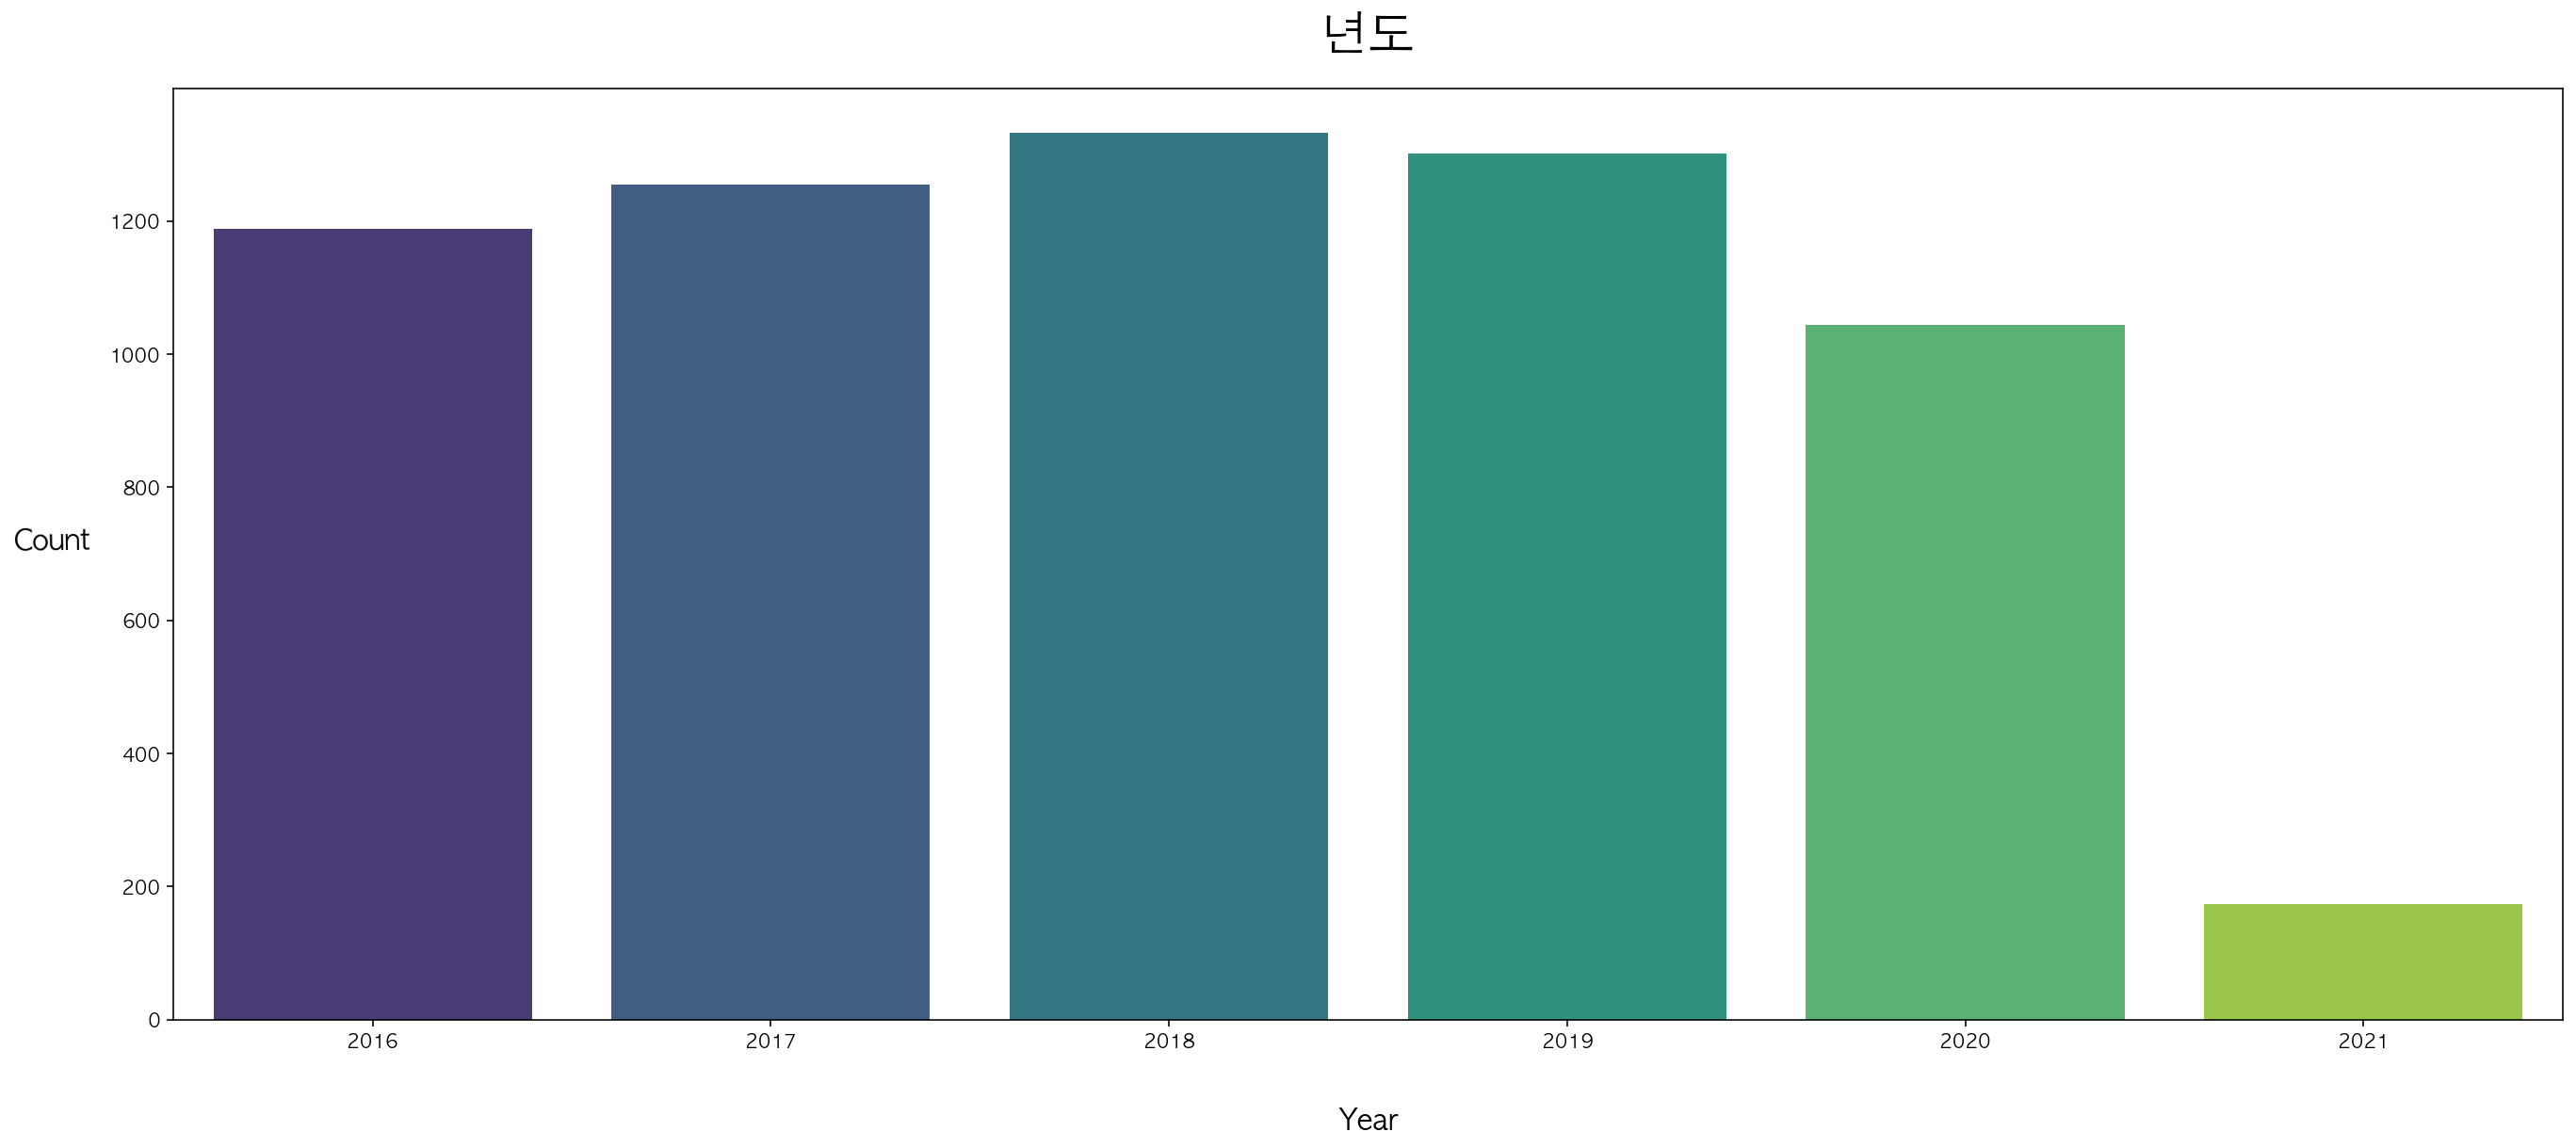

In [54]:
# 연도별 광고 횟수 
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data['Year'].value_counts()).sort_index().T, palette='viridis', ci=False)     

plt.title('년도', fontsize=25, y=1.03)       
plt.xlabel('Year', fontsize=15, labelpad=30)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- 2016년 1,188건, 2017년 1,254건, 2018년 1,332건, 2019년 1,302건, 2020년 1,044건
- 2021년은 1월 부터 3월 174건  
- 연도별로 보았을 때 2018년도에 광고를 가장 많이 노출 시켰음.

In [72]:
# 광고주를 기준으로 광고횟수, GRP, 도달자수, 시청자수를 각각 더함.
idx_ad = data[["Advertiser","GRP","광고횟수","도달자수","시청자수"]].copy().groupby("Advertiser").sum()

,GRP,광고횟수,도달자수,시청자수
Advertiser,,,,
BMW코리아,52573.6,287898,982908993,3637055454
FCA코리아,9257.0,32268,147606815,675725057
FMK,11642.1,168012,261665899,803217689
기흥인터내셔널,469.1,108,11381072,33715417
더클래스효성,1209.3,4494,14996504,80854464
도이치모터스,83.9,30,1927607,6022322
메르세데스벤츠코리아,31360.0,71268,702991830,2230972533
볼보자동차코리아,70174.9,339582,962904106,5020344582
비워크,38.1,660,1706712,2702507


In [75]:
# 브랜드별 도달자수&시청자수그리프 표현 
fig = px.scatter(idx_ad, 
                 size=idx_ad['GRP'],
                 x=idx_ad['광고횟수'], 
                 y=idx_ad['도달자수'],
                 color=idx_ad.index, 
                 labels={'x':"광고횟수", 'y':"도달자수", 'species':"Brand"})
fig.show();

- 도달자수와 시청자수는 대체로 비례하는 편
- 광고횟수가 많을수록 도달자 및 시청자가 많다
- 도요타가 광고횟수압도적 1등

In [76]:
# 평균 시청률 
data['평균시청률'] = data['GRP'] / data['광고횟수']

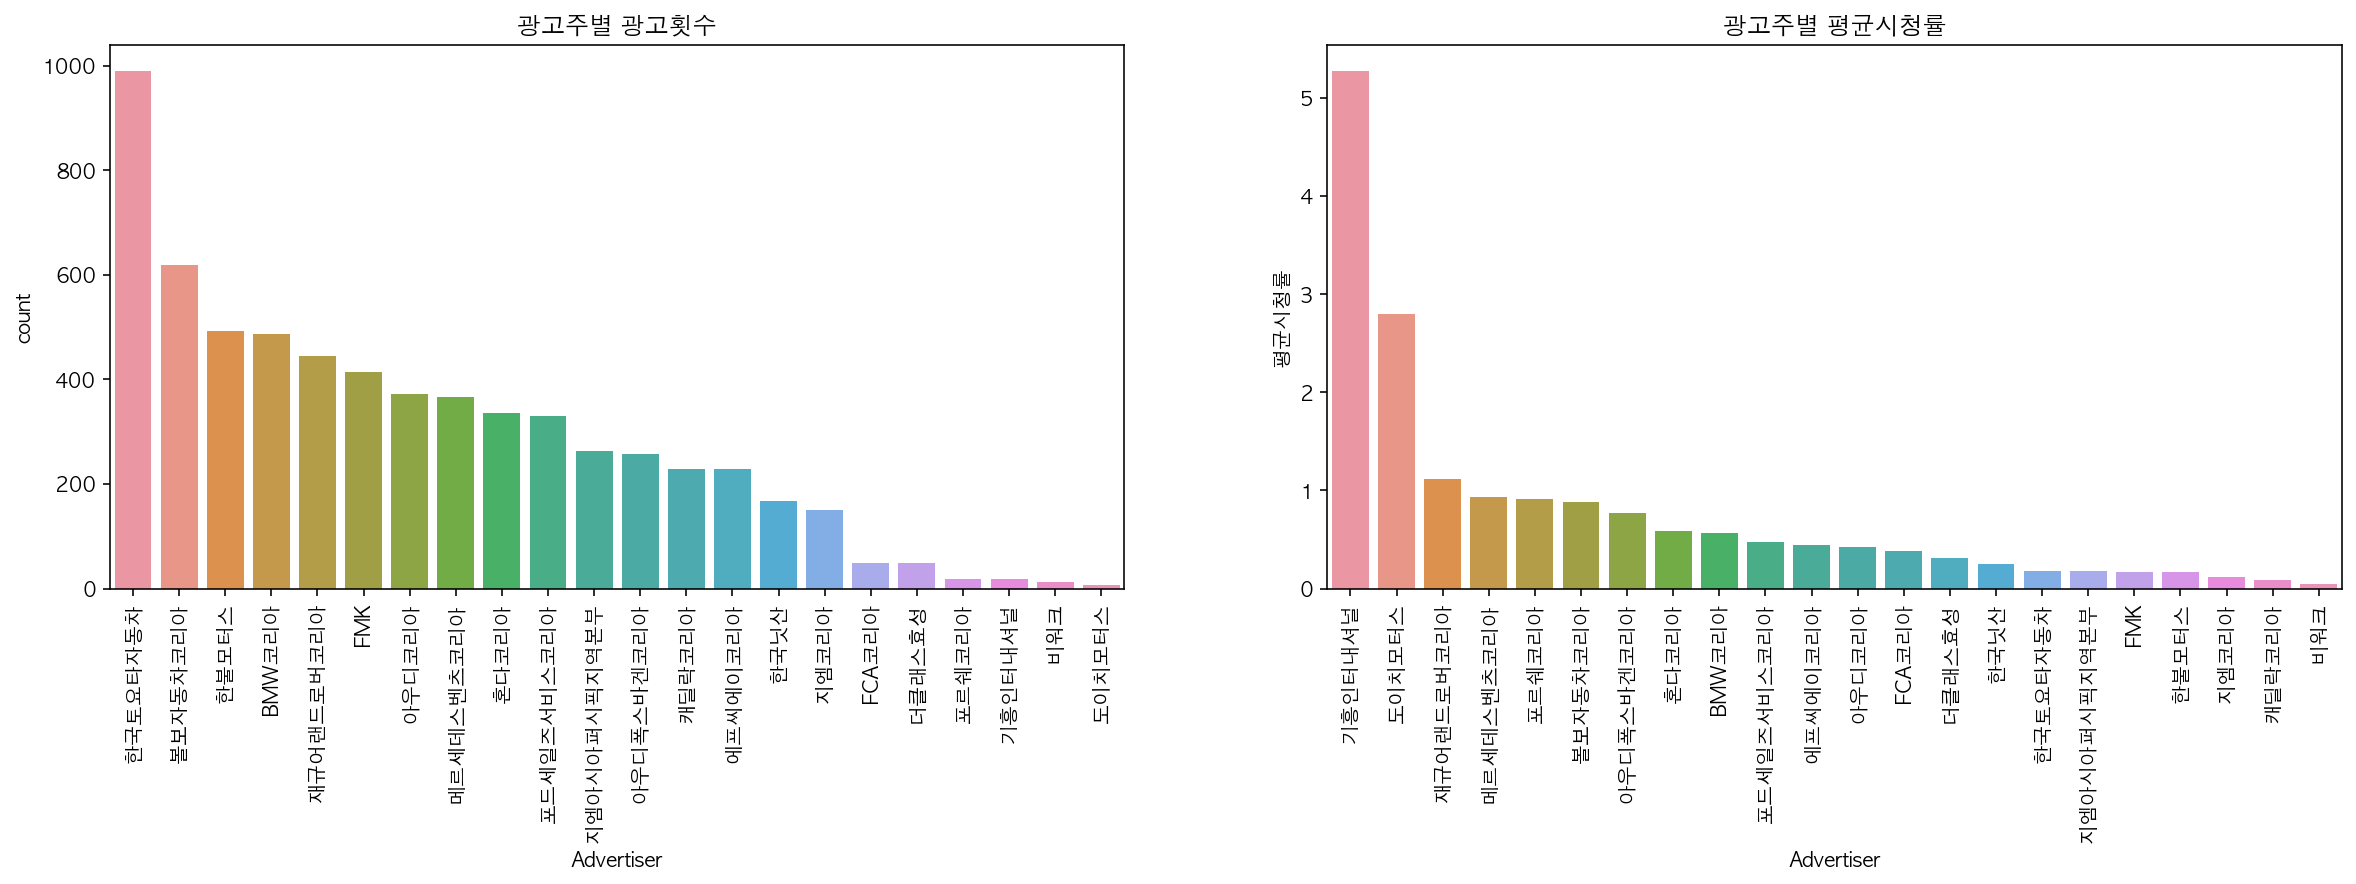

In [81]:
plt.figure(figsize=(20, 5))

#광고주별 광고횟수
ad_count = data.groupby("Advertiser").size().reset_index(name='count')
ad_count.sort_values('count', ascending=False, inplace=True)

# 그래프
plt.subplot(121)
sns.barplot(data=ad_count, x="Advertiser", y='count')
plt.xticks(rotation=90)
plt.title('광고주별 광고횟수')

#광고주별 평균시청률
avg_view = data.groupby('Advertiser').agg('mean')[['평균시청률']].reset_index()
avg_view.sort_values('평균시청률', ascending=False, inplace=True)

# 광고주별 평균시청률 그래프
plt.subplot(122)
sns.barplot(data=avg_view, x='Advertiser', y='평균시청률')
plt.xticks(rotation=90)
plt.title('광고주별 평균시청률')

plt.show()

- 광고는 한국토요타자동차가 가장 많이 했지만 평균 시청률을 기준으로는 기흥인터내셔널이 가장 높게 나타났다. 
- 즉 광고횟수와 평균시청률은 비례하지 않는다.

- 회사별로 브랜드가 중복된 곳이 많아 정리가 필요하여 이렇게 정리해보았다.
  - 한국토요타자동차 : 토요타, 렉서스
  - 볼보자동차코리아 : 볼보 
  - 한불모터스 : 푸조, 시트로엥
  - BMW코리아 : BMW
  - 도이치모터스 : BMW
  - 재규어랜드로버코리아 : 재규어, 랜드로버
  - FMK(효성그룹 계열사) : 마세라티
  - 아우디코리아 : 아우디
  - 아우디폭스바겐코리아 : 폭스바겐
  - 포르쉐코리아 : 포르쉐
  - 메르세데스벤츠코리아 : 벤츠
  - 더클래스효성 : 벤츠
  - 혼다코리아 : 혼다
  - 포드세일즈서비스코리아 : 포드, 링컨
  - 지엠아시아퍼시픽지역본부 : 캐딜락
  - 캐딜락코리아 : 캐딜락
  - 지엠코리아 : 캐딜락
  - 에프씨에이코리아 : 지프, 피아트
  - FCA코리아(피아트, 크라이슬러) : 지프
  - 비워크(광고대행업체) : 지프
  - 한국닛산 : 닛산, 인피니티
  - 기흥인터내셔널 : 애스턴마틴

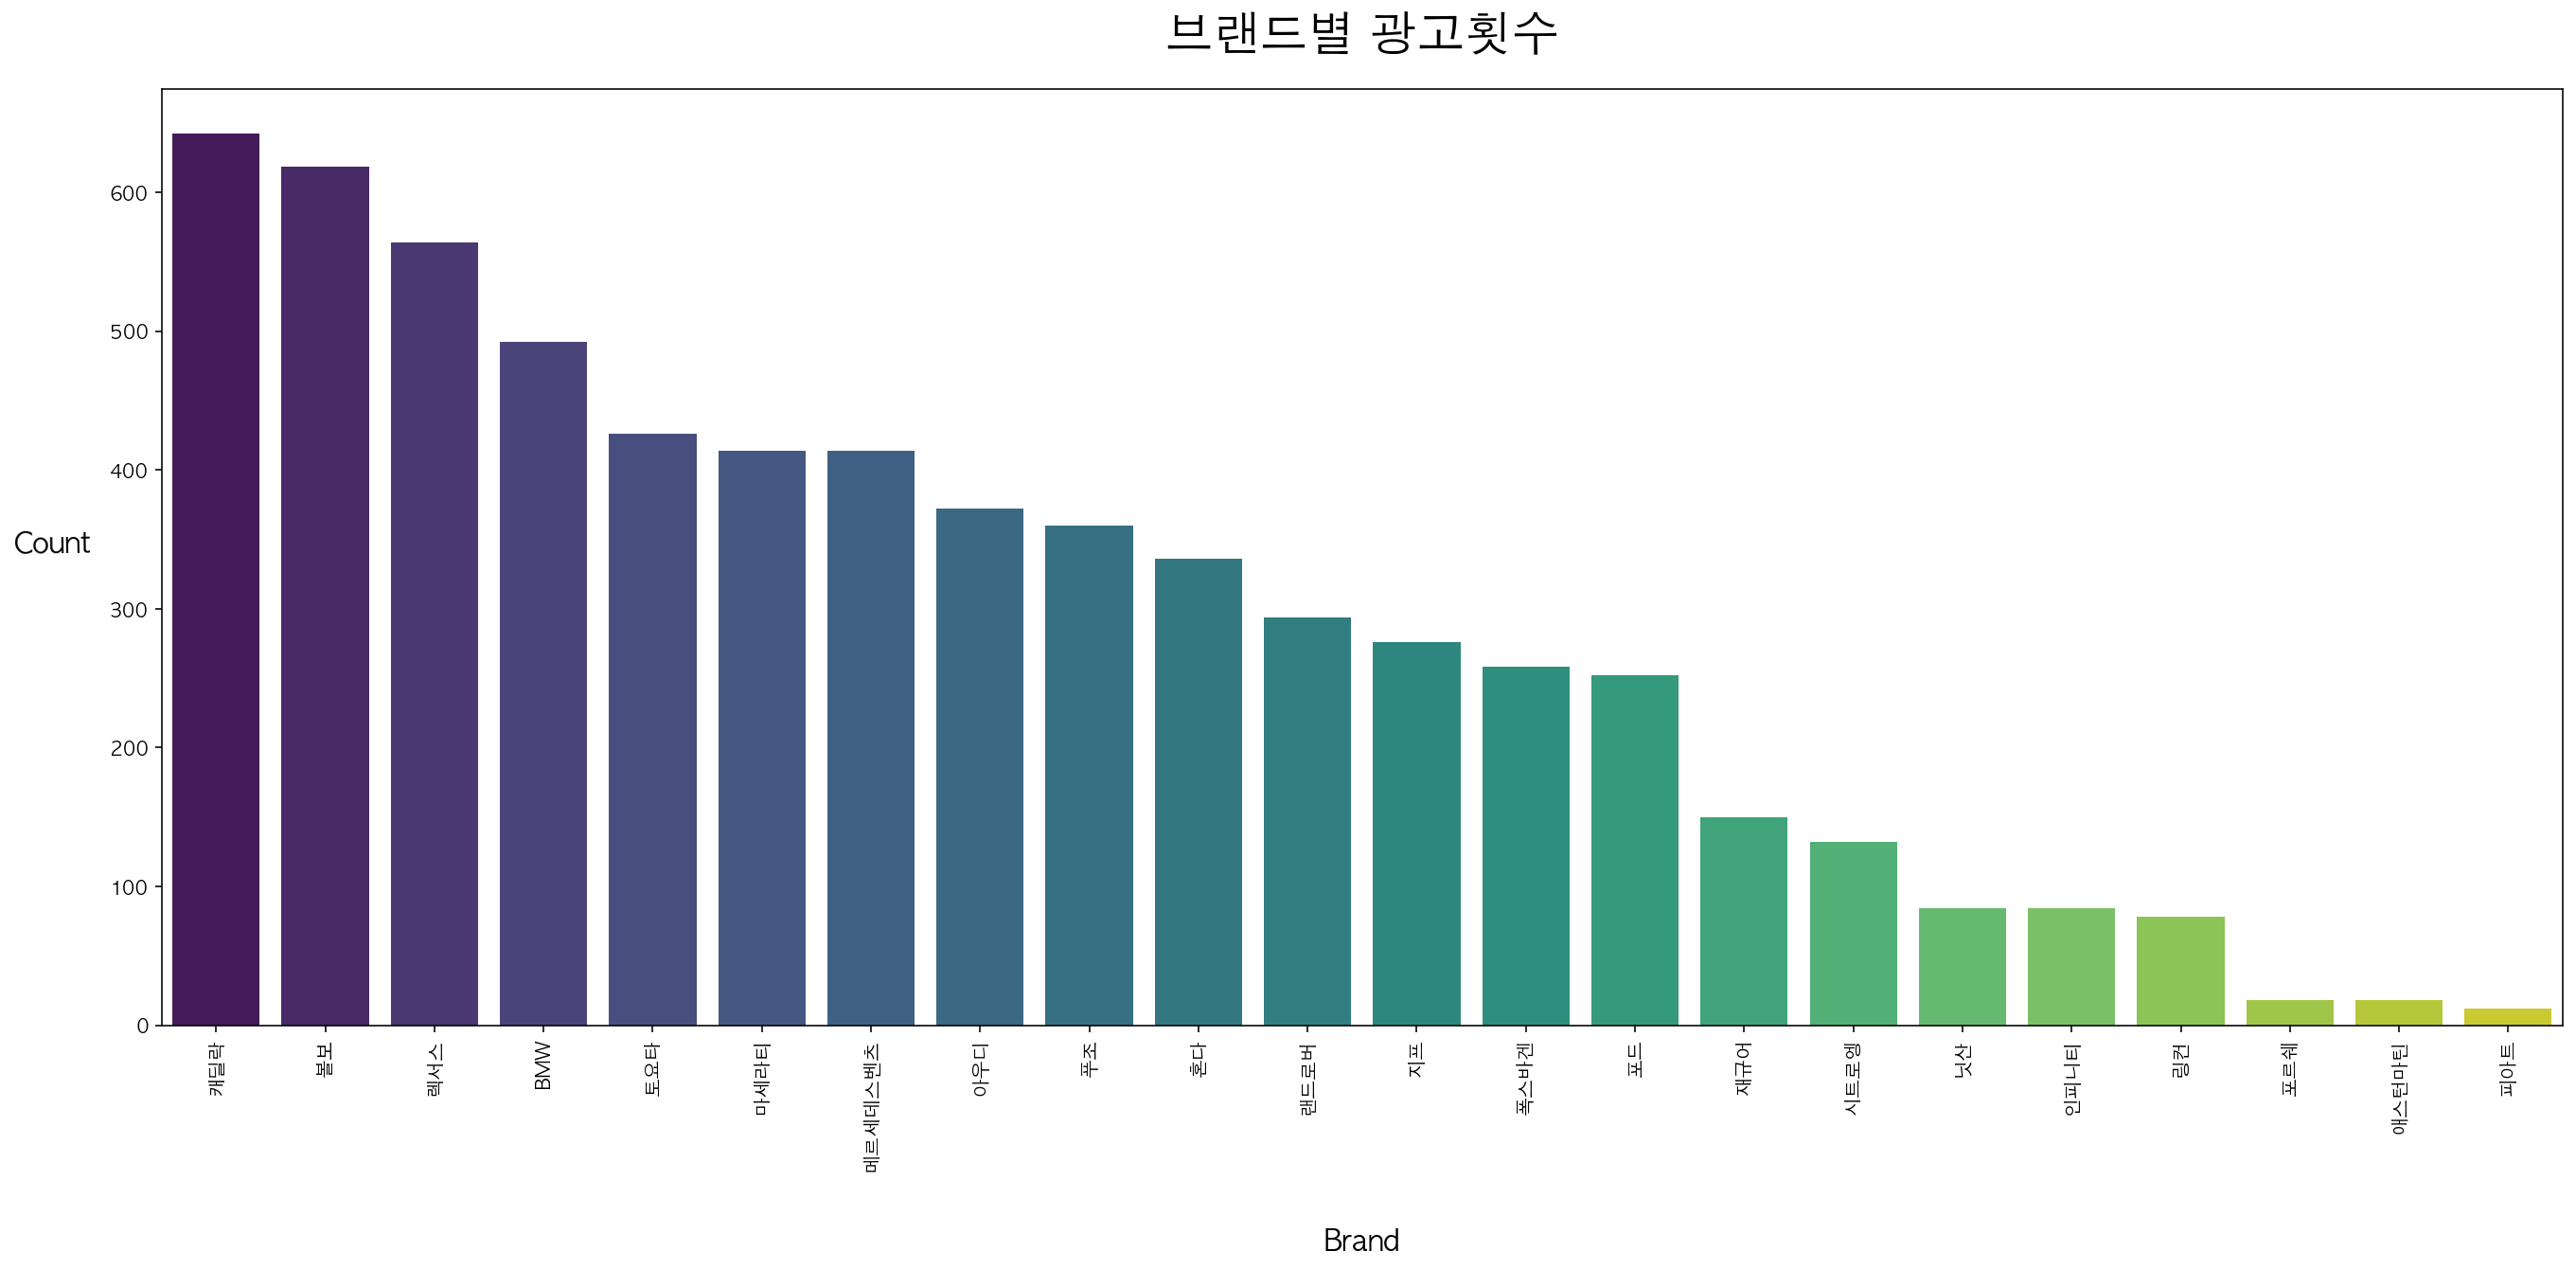

In [82]:
# 브랜드별 광고 횟수
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data['Brand'].value_counts()).T, palette='viridis', ci=False)     

plt.title('브랜드별 광고횟수', fontsize=25, y=1.03)       
plt.xlabel('Brand', fontsize=15, labelpad=30)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  
plt.xticks(rotation=90)

plt.show()

In [84]:
# 연령대와 광고년도를 기준으로 그룹을 묶어 평균으로 연산 
## 월 행은 삭제 
age_df = data.groupby(['연령대','Year']).mean().round(2).reset_index()
age_df.drop('Month',axis=1,inplace=True)
age_df

,연령대,Year,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률
0,20대,2016,376.28,1206976.52,34.85,483278.19,13.96,3.80,1.61,0.91,0.57,0.19
1,20대,2017,656.73,1186132.48,35.77,476704.37,14.38,4.14,1.80,0.95,0.52,0.11
2,20대,2018,573.25,1189500.95,35.58,487554.65,14.58,4.18,1.73,0.87,0.45,0.18
3,20대,2019,461.37,1018749.87,30.07,377482.16,11.14,3.57,1.62,0.86,0.49,0.16
4,20대,2020,565.24,1443287.00,42.19,435319.70,12.73,4.61,2.37,1.40,0.90,0.46
5,20대,2021,560.31,1163011.69,33.74,406952.03,11.80,3.70,1.84,1.11,0.67,0.06
6,30대,2016,376.28,2132995.48,51.44,734725.08,17.72,5.87,2.82,1.64,1.05,0.28
7,30대,2017,656.73,2802313.23,71.30,865899.68,22.03,8.42,4.42,2.61,1.63,0.22
8,30대,2018,573.25,3051690.01,78.95,956321.90,24.74,9.52,4.85,2.71,1.60,0.34
9,30대,2019,461.37,2121841.97,55.86,661745.60,17.42,6.55,3.39,1.94,1.18,0.26


In [85]:
px.box(data_frame=age_df, x='연령대', y='GRP', title="연령대별 GRP")

In [86]:
px.box(data_frame=age_df, x='연령대', y='도달율 1+', title="연령대별 도달률 1+")

In [87]:
px.box(data_frame=age_df, x='연령대', y='도달율 3+', title="연령대별 도달률 3+")

In [88]:
px.box(data_frame=age_df, x='연령대', y='도달율 5+', title="연령대별 도달률 5+")

In [89]:
# 평균 노출빈도 구하기 
data['평균노출빈도'] = data['GRP'] / data['도달율 1+']
data['평균노출빈도'].fillna(0, inplace=True)
data['평균노출빈도'].replace(np.inf, 0, inplace=True)
data.tail()

,date,Year,Month,Advertiser,Product,Brand,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
2233,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,30대,498,767415,20.8,535073,14.5,1.5,0.2,0.1,0.1,0.041767,1.434483
2234,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,40대,498,1581617,38.4,890827,21.6,4.4,0.2,0.0,0.0,0.077108,1.777778
2235,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,50대,498,3023227,73.9,1370128,33.5,9.9,2.2,0.8,0.4,0.148394,2.205970
2236,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,60대,498,5377999,106.1,2194754,43.3,15.8,5.3,1.9,0.7,0.213052,2.450346
2237,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,개인,498,11827075,49.1,5573971,23.1,6.5,1.7,0.6,0.2,0.098594,2.125541


In [90]:
# 광고주와 연령대를 기준으로 그룹화 (평균 기준)
ad_age = data.groupby(["Advertiser", "연령대"]).agg('mean').round(6)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
ad_age.tail()

,Advertiser,연령대,GRP,평균시청률,평균노출빈도
127,혼다코리아,30대,28.196429,0.434702,1.525901
128,혼다코리아,40대,50.917857,0.773733,1.840891
129,혼다코리아,50대,58.366071,0.860406,1.964544
130,혼다코리아,60대,55.069643,0.664354,1.921900
131,혼다코리아,개인,38.912500,0.546491,1.834624


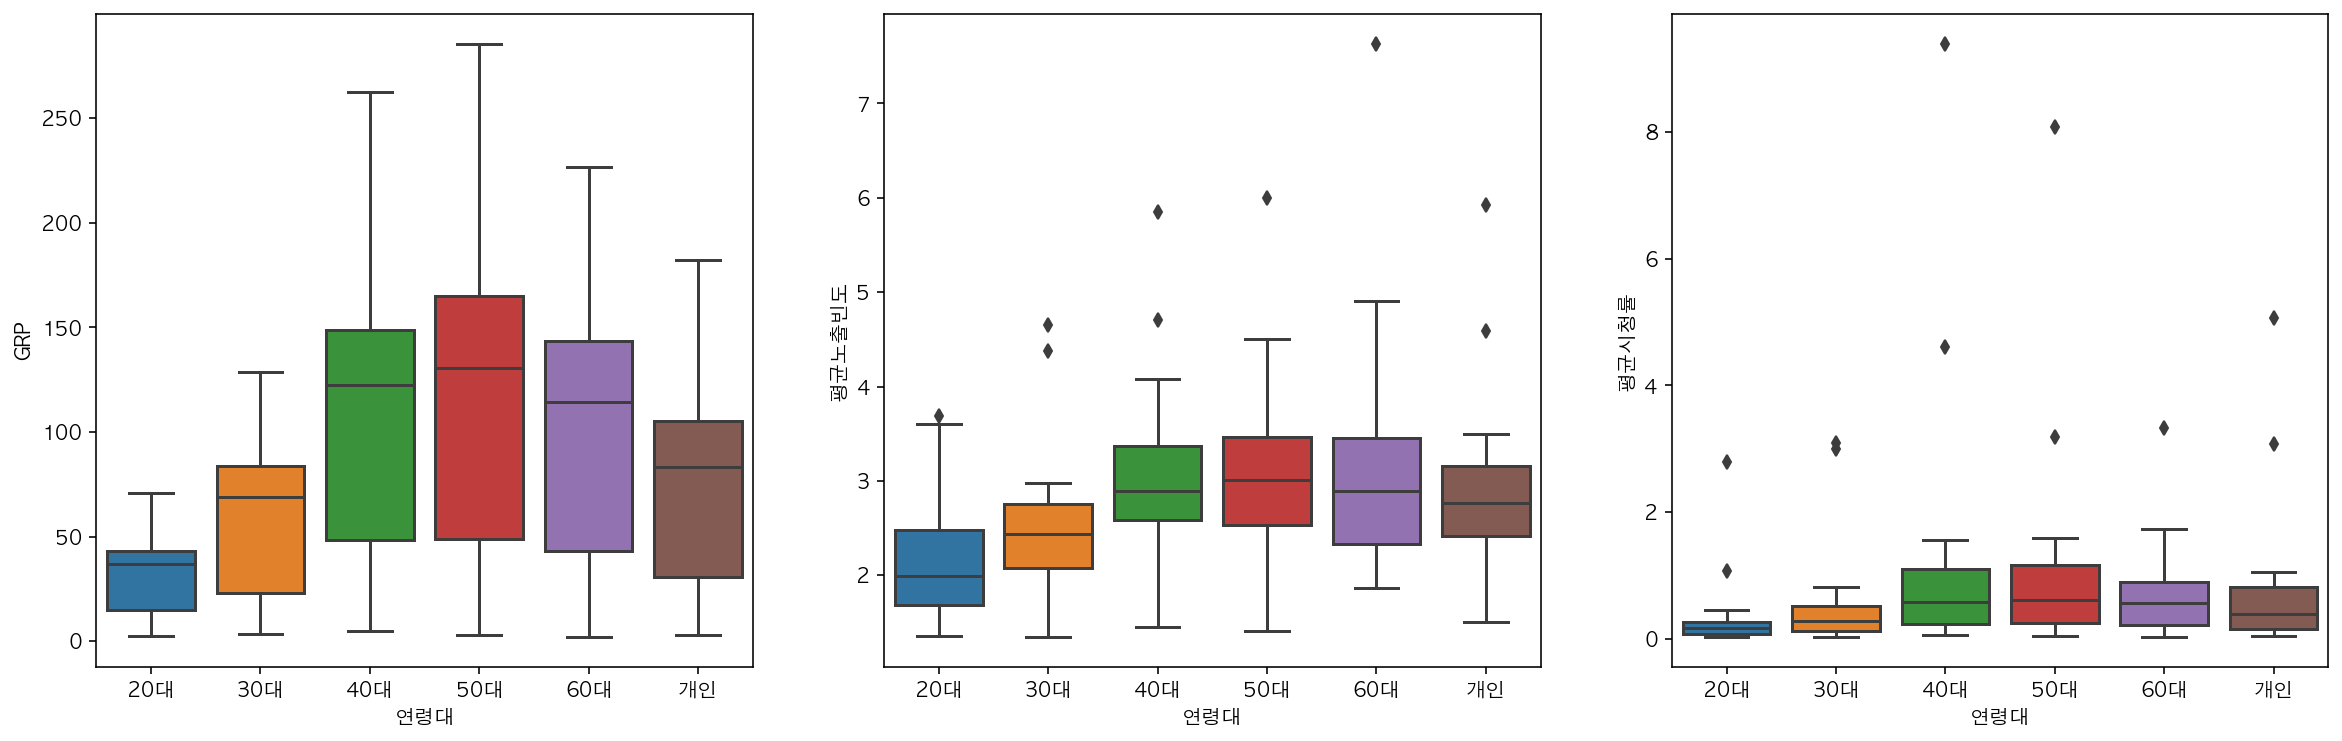

In [91]:
plt.figure(figsize=(20, 6))

#연령별 GRP
plt.subplot(131)
sns.boxplot(data=ad_age, x='연령대', y='GRP')

#연령별 평균노출빈도
plt.subplot(132)
sns.boxplot(data=ad_age, x="연령대", y='평균노출빈도')

#연령별 평균시청률
plt.subplot(133)
sns.boxplot(data=ad_age, x="연령대", y='평균시청률')

plt.show()

In [123]:
# 광고주, Product, 연도, 연령대별 광고횟수, GRP, 도달지수, 시청자수
apya = data[["Advertiser","Product","Year","연령대", "광고횟수","GRP","도달자수","시청자수"]].copy().groupby(["Advertiser","Product","Year","연령대"]).mean().reset_index()
apya = apya.astype({"도달자수":int, "시청자수":int})
apya.drop(apya[apya["연령대"]=="개인"].index)

,Advertiser,Product,Year,연령대,광고횟수,GRP,도달자수,시청자수
0,BMW코리아,BMW3시리즈,2019,20대,814.4,31.56,380731,1069815
1,BMW코리아,BMW3시리즈,2019,30대,814.4,61.32,785572,2328816
2,BMW코리아,BMW3시리즈,2019,40대,814.4,110.98,1206770,4713253
3,BMW코리아,BMW3시리즈,2019,50대,814.4,107.38,1192444,4260110
4,BMW코리아,BMW3시리즈,2019,60대,814.4,79.62,1070082,3606191
...,...,...,...,...,...,...,...,...
1806,혼다코리아,혼다파일럿,2019,20대,251.5,33.40,522724,1131385
1807,혼다코리아,혼다파일럿,2019,30대,251.5,64.40,1042328,2445939
1808,혼다코리아,혼다파일럿,2019,40대,251.5,119.40,1663696,5071028
1809,혼다코리아,혼다파일럿,2019,50대,251.5,108.70,1535110,4310834


In [124]:
#(광고주)시청자별 도달지수
fig = px.scatter(apya, 
                 size=apya['GRP'],
                 y=apya['도달자수'], 
                 x=apya['시청자수'],
                 color='Advertiser', 
                 labels={'x':"시청자수",'y':"도달자수"})
fig.show()

In [127]:
#(광고주,연령대)광고횟수별 도달지수
fig = px.scatter(apya, x="광고횟수", y="도달자수", animation_frame="Year", animation_group="Advertiser",
           size="GRP", color="Advertiser", hover_name="Advertiser", facet_col="연령대",
           size_max=30, range_x=[-100, 2500], range_y=[1,4000000])
fig.show()